In [106]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
import PIL
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Load datasets

In [53]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

# Explore our dataset
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print("Number of training examples: "+str(m_train))
print("Number of testing examples: "+ str(m_test))
print("Each image is of size: ("+str(num_px)+","+str(num_px) + ",  3)")
print("train_x_orig shape: "+str(train_x_orig.shape))
print("train_y shape: "+str(train_y.shape))
print("test_x_orig shape: "+str(test_x_orig.shape))
print("test_y shape: "+str(test_y.shape))

'''#Example of a picture
index = 18
plt.imshow(train_x_orig[index])
print("Y = "+str(train_y[0, index]) +". It's "+classes[train_y[0, index]]. decode("utf-8")+ " picture.")'''

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64,64,  3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


'#Example of a picture\nindex = 18\nplt.imshow(train_x_orig[index])\nprint("Y = "+str(train_y[0, index]) +". It\'s "+classes[train_y[0, index]]. decode("utf-8")+ " picture.")'

In [54]:
# Reshape the training and test examples
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standarize data to have feature values between 0 and 1
train_x = train_x_flatten/255
test_x = test_x_flatten/255

print("Train_x's shape: "+str(train_x.shape))
print("test_x's shape: "+str(test_x.shape))

Train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [55]:
# constant defining the model
n_x = 12288 #num_px*num_px*3
n_h = 7
n_y = 1
layers_dims = (n_x, n_y, n_y)


# For Two-layer neural network
Model structure
```python
def initialize_parameters(n_x, n_h, n_y):
    ...
    return parameters 
def linear_activation_forward(A_prev, W, b, activation):
    ...
    return A, cache
def compute_cost(AL, Y):
    ...
    return cost
def linear_activation_backward(dA, cache, activation):
    ...
    return dA_prev, dW, db
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [87]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost = False):
    np.random.seed(1)
    grads = {}
    costs = []
    m = X.shape[1]
    (n_x, n_h, n_y) = layers_dims
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    W1 = parameters["W1"]
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # loop for gradient descent
    for i in range(0, num_iterations):
        
        # Forward propagation
        A1, cache1 = linear_activation_forward(X, W1, b1, activation = 'relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation = 'sigmoid')
        
        cost = compute_cost(A2, Y)
        
        # Backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation = 'sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation = 'relu')
        
        # set grads
        
        grads["dW1"] = dW1
        grads["db1"] = db1
        grads["dW2"] = dW2
        grads["db2"] = db2
        
        # Update parameters
        parameters  = update_parameters(parameters, grads, learning_rate)
        
        W1 = parameters["W1"]
        b1 = parameters['b1']
        W2 = parameters['W2']
        b2 = parameters['b2']
        
        # print the cost every 100 trainig example
        if print_cost and i %100 ==0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i %100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title('Learning rage = '+str(learning_rate))
    
    return parameters
    
    
    

Cost after iteration 0: 0.6930497356599888
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912678
Cost after iteration 300: 0.6015024920354665
Cost after iteration 400: 0.5601966311605747
Cost after iteration 500: 0.5158304772764729
Cost after iteration 600: 0.47549013139433255
Cost after iteration 700: 0.43391631512257495
Cost after iteration 800: 0.40079775362038866
Cost after iteration 900: 0.3580705011323798
Cost after iteration 1000: 0.3394281538366413
Cost after iteration 1100: 0.3052753636196264
Cost after iteration 1200: 0.27491377282130164
Cost after iteration 1300: 0.24681768210614832
Cost after iteration 1400: 0.1985073503746611
Cost after iteration 1500: 0.17448318112556666
Cost after iteration 1600: 0.17080762978096903
Cost after iteration 1700: 0.11306524562164708
Cost after iteration 1800: 0.09629426845937143
Cost after iteration 1900: 0.08342617959726858
Cost after iteration 2000: 0.07439078704319078
Cost after iteration 2100: 0.066307

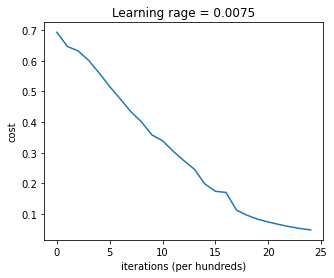

In [88]:
# let's see how much our paramete learn
parameters = two_layer_model(train_x, train_y, 
                             layers_dims = (n_x, n_h, n_y),
                             num_iterations = 2500,
                             print_cost = True)


Let's check how much our model predict for training set and test set

In [90]:
prediction_train = predict(train_x, test_y, parameters)

predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.0
Accuracy: 0.72


# L-layer Neural Network
Model stracture

```python
def initialize_parameters_deep(layers_dims):
    ...
    return parameters 
def L_model_forward(X, parameters):
    ...
    return AL, caches
def compute_cost(AL, Y):
    ...
    return cost
def L_model_backward(AL, Y, caches):
    ...
    return grads
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [71]:
# layer define 
layers_dims = [12288, 20, 7, 5, 1] # 4-layer model

In [91]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost = False):
    np.random.seed(1)
    costs = []
    
    # parameter initialize
    parameters = initialize_parameters_deep(layers_dims)
    
    # loop for gradient descent
    for i in range(0, num_iterations):
        # Forward propagation
        AL, caches = L_model_forward(X, parameters)
        
        # compute cost
        cost = compute_cost(AL, Y)
        
        # Backward propagation
        grads = L_model_backward(AL, Y, caches)
        
        # update parameter
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # print the cost every 1000 training example
        if print_cost and i%100 == 0:
            print("Cost after iteration %i: %f"%(i, cost))
        if print_cost and i%100 ==0:
            costs.append(cost)
    
    #plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title('Learning rate = '+str(learning_rate))
    
    return parameters

Cost after iteration 0: 0.771749
Cost after iteration 100: 0.672053
Cost after iteration 200: 0.648263
Cost after iteration 300: 0.611507
Cost after iteration 400: 0.567047
Cost after iteration 500: 0.540138
Cost after iteration 600: 0.527930
Cost after iteration 700: 0.465477
Cost after iteration 800: 0.369126
Cost after iteration 900: 0.391747
Cost after iteration 1000: 0.315187
Cost after iteration 1100: 0.272700
Cost after iteration 1200: 0.237419
Cost after iteration 1300: 0.199601
Cost after iteration 1400: 0.189263
Cost after iteration 1500: 0.161189
Cost after iteration 1600: 0.148214
Cost after iteration 1700: 0.137775
Cost after iteration 1800: 0.129740
Cost after iteration 1900: 0.121225
Cost after iteration 2000: 0.113821
Cost after iteration 2100: 0.107839
Cost after iteration 2200: 0.102855
Cost after iteration 2300: 0.100897
Cost after iteration 2400: 0.092878


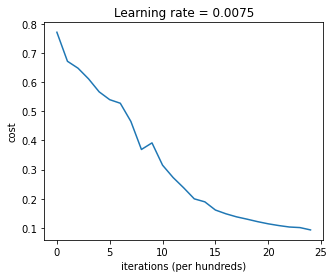

In [92]:
# Now train our model with 4 layer 
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)


In [95]:
# Model accuracy for training set and test set 
prd_train = predict(train_x, train_y, parameters)
prd_test = predict(test_x, test_y, parameters)

Accuracy: 98.5645933014354%
Accuracy: 80.0%
